In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

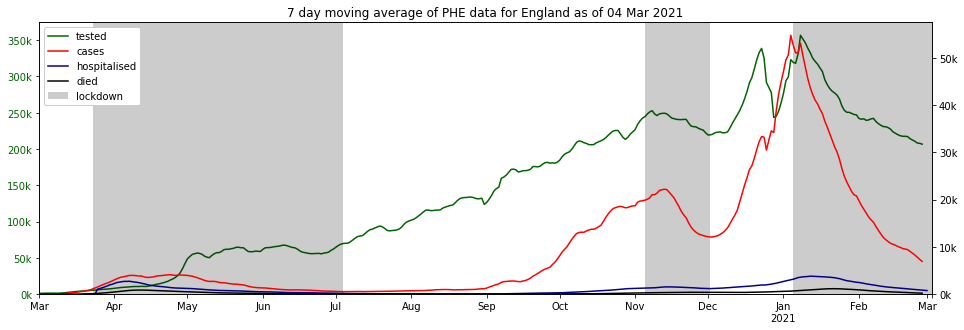

In [2]:
plot_summary(earliest_date='2020-03-01')

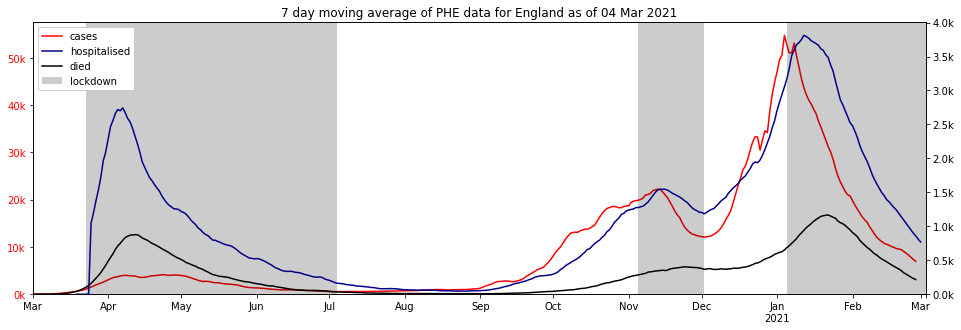

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,684220.0,17785702.0,17101482.0,56286961,1.215592,30.382671,68.401737
1,Northern Ireland,N92000002,40139.0,556721.0,516582.0,1893667,2.119644,27.279453,70.600903
2,Scotland,S92000003,100058.0,1688608.0,1588550.0,5463300,1.831457,29.076748,69.091794
3,Wales,W92000004,139445.0,951540.0,812095.0,3152879,4.422783,25.757252,69.819965


'partial: 20,982,571, full: 963,862'

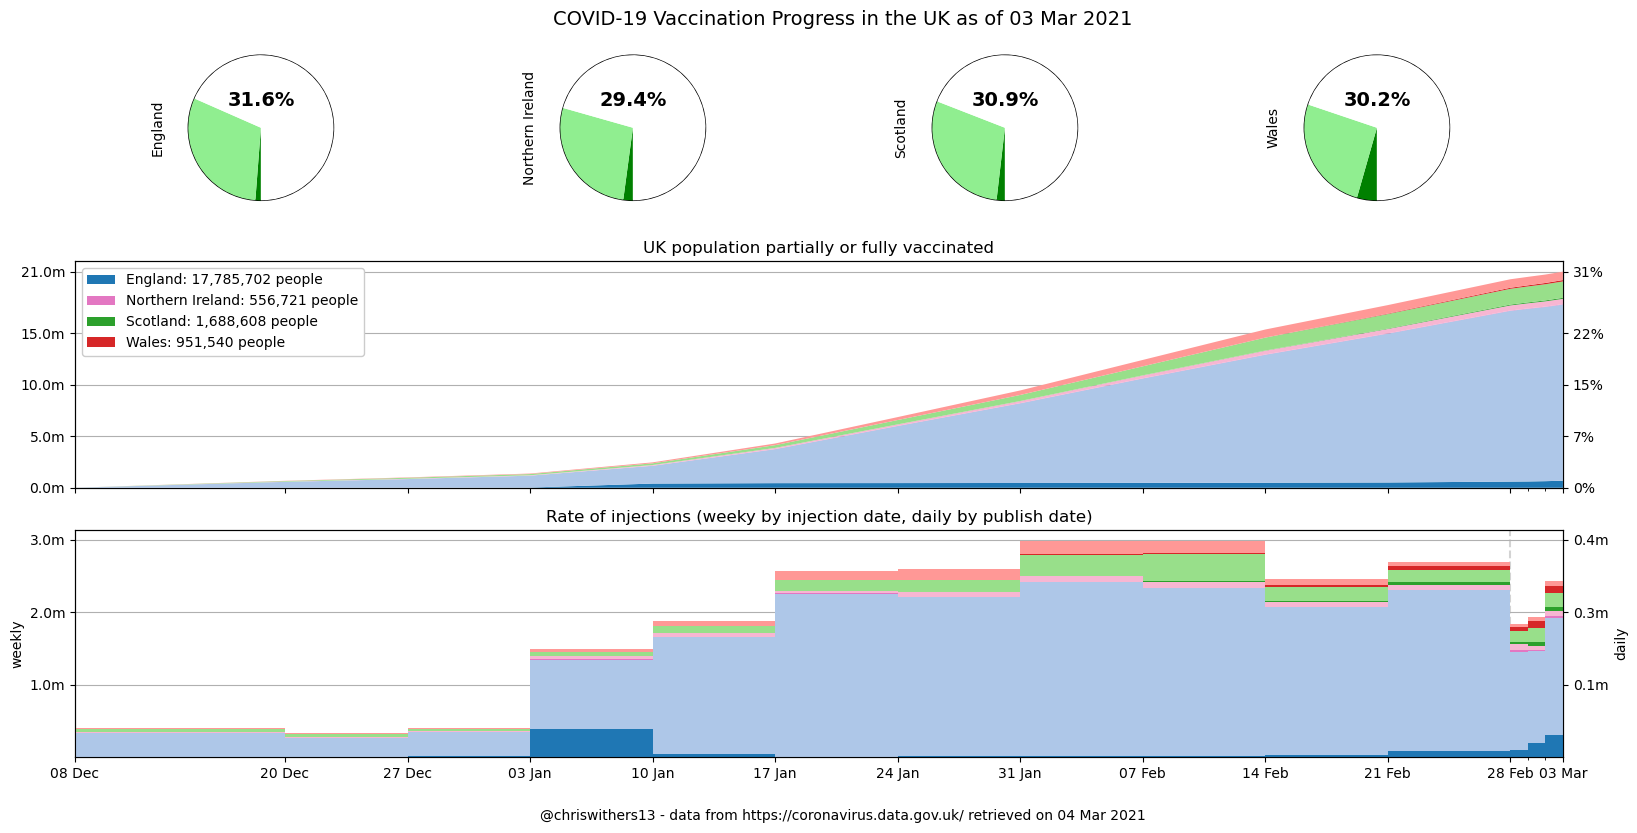

In [4]:
results = vaccination_dashboard(show_partial=True)
display(results, f"partial: {results['any'].sum():,.0f}, full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

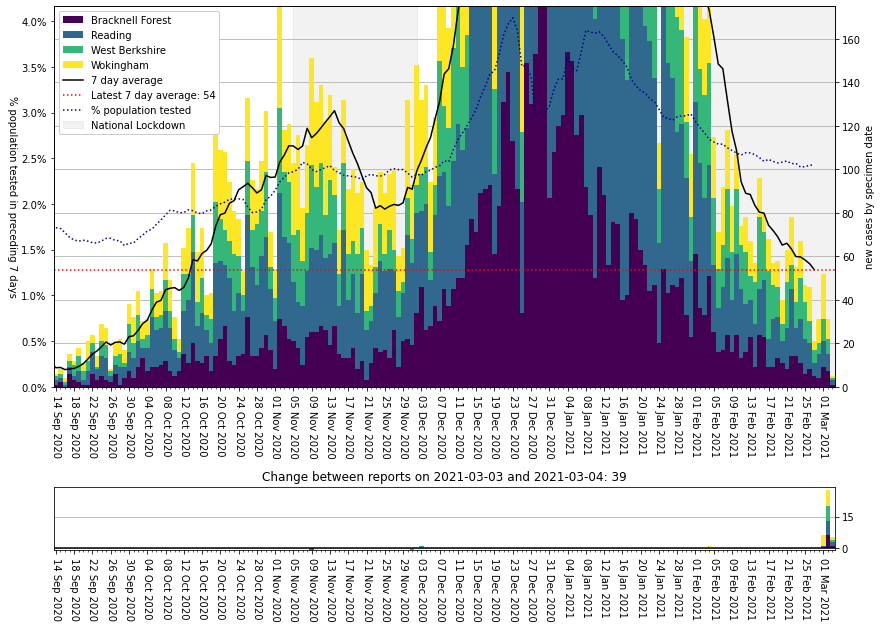

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

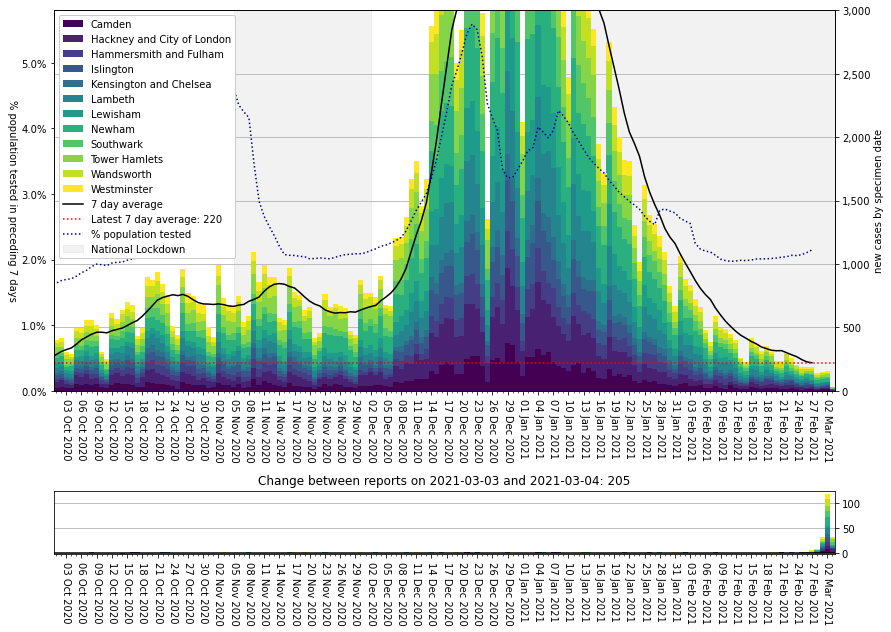

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,141.637563,73.0,2021-03-03
E08000016,Barnsley,134.080837,331.0,2021-03-03
E06000016,Leicester,132.966710,471.0,2021-03-03
E07000039,South Derbyshire,128.658133,138.0,2021-03-03
E07000134,North West Leicestershire,128.364749,133.0,2021-03-03
E07000136,Boston,128.254457,90.0,2021-03-03
E07000150,Corby,127.392063,92.0,2021-03-03
E08000032,Bradford,126.533970,683.0,2021-03-03
E06000010,"Kingston upon Hull, City of",125.106822,325.0,2021-03-03


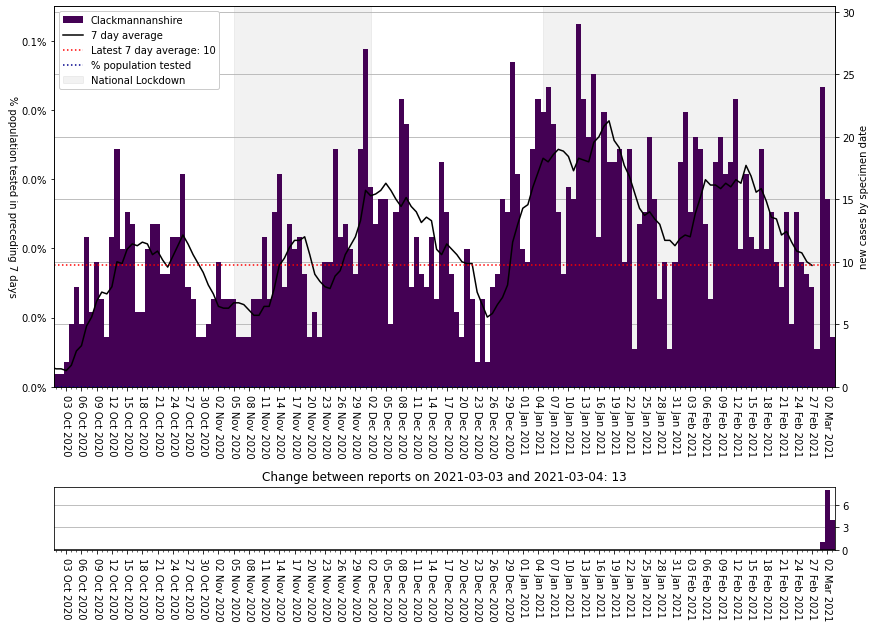

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,82.850477,946.0,2021-03-03
E08000035,Leeds,90.400296,717.0,2021-03-03
E08000032,Bradford,126.533970,683.0,2021-03-03
S12000049,Glasgow City,91.293910,578.0,2021-03-03
E06000016,Leicester,132.966710,471.0,2021-03-03
E06000047,County Durham,83.758730,444.0,2021-03-03
E08000019,Sheffield,72.667833,425.0,2021-03-03
E08000003,Manchester,76.692388,424.0,2021-03-03
E08000036,Wakefield,119.146053,415.0,2021-03-03


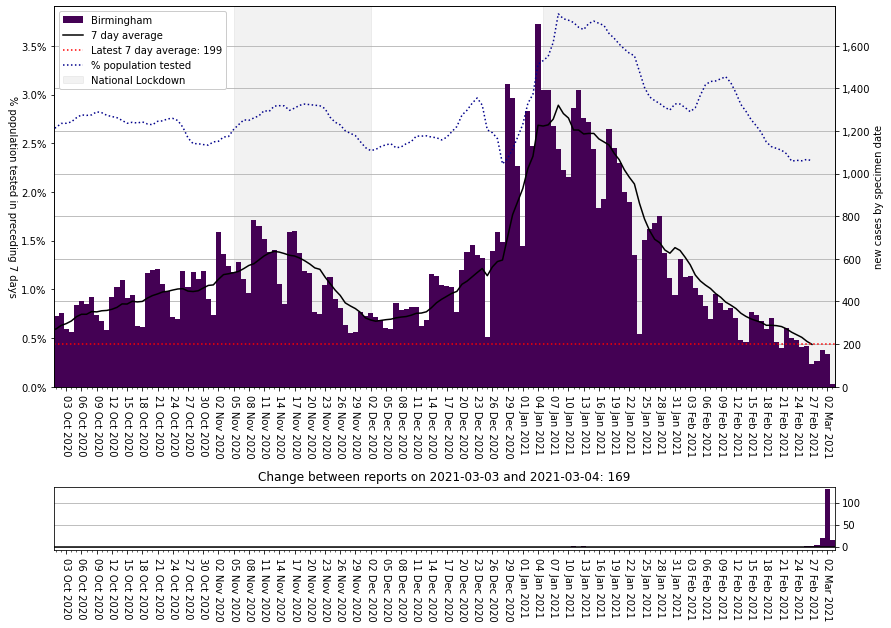

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [18]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

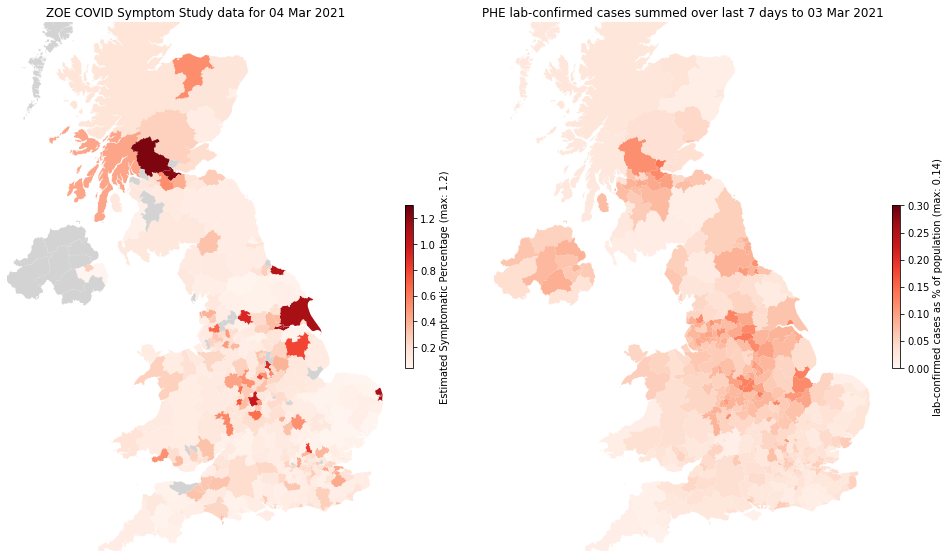

In [19]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

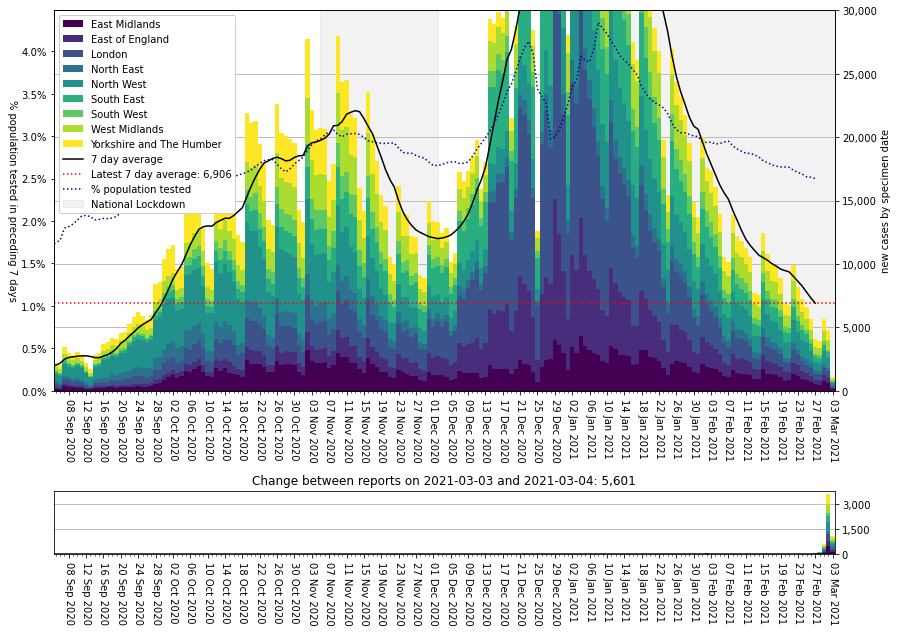

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

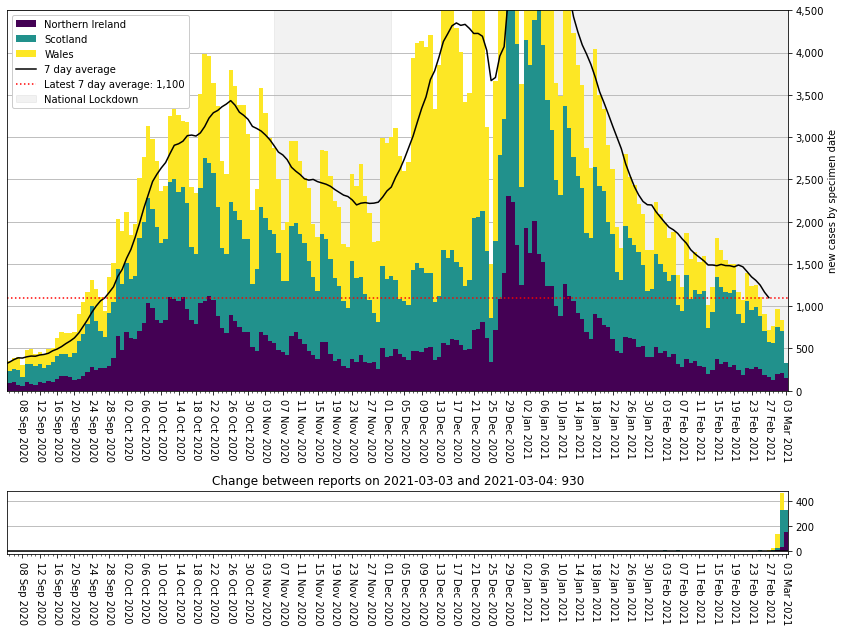

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')